In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import files

In [99]:
file = pd.read_csv(r'/home/gdeandrea/Scaricati/Econofisica-RNDM - Foglio1(3).csv', header=28)

In [100]:
file = file.replace(',','.', regex=True)
file = file.drop('chisq_soglie', axis=1)
file = file.drop('chisq_soglini', axis=1)
file = file.drop('commenti', axis=1)

In [101]:
for column in file.columns:
    
    file[column] = pd.to_numeric(file[column])

file.head(20)

,rndm %,soglia,err_soglia,soglino,err_soglino,durate,errore,tempiattesa,errore.1,ampiezze,errore.2,sigma_soglia,sigma_baseline,numero rivolte,numero rivoltini,numero spike,#tick
0,0.0000,137.62,8.37,15.86,3.60,10.81,0.11,19.55,1.42,217.05,16.17,3.0,3.0,31.0,6.0,40.0,980.0
1,0.0025,103.06,10.36,23.11,2.22,10.51,0.13,14.39,1.20,205.62,12.67,3.0,3.0,33.0,12.0,48.0,990.0
2,0.0050,100.29,8.34,16.81,8.03,10.03,0.15,13.47,1.22,171.10,12.93,3.0,3.0,38.0,8.0,50.0,990.0
3,0.0075,107.87,6.26,18.99,6.01,10.07,0.15,11.95,6.98,184.30,9.92,3.0,3.0,34.0,12.0,53.0,980.0
4,0.0100,91.54,7.36,20.83,5.98,10.77,0.21,12.79,1.09,156.78,11.66,3.0,3.0,38.0,9.0,51.0,990.0
5,0.0125,98.42,6.79,20.24,3.87,10.63,0.17,11.72,1.13,157.77,11.71,3.0,3.0,38.0,13.0,63.0,973.0
6,0.0150,91.77,7.26,16.81,4.04,10.49,0.15,12.76,0.83,164.07,10.25,3.0,3.0,35.0,16.0,61.0,990.0
7,0.0175,91.25,6.63,19.81,5.46,10.41,0.18,12.43,0.91,160.63,9.38,3.0,3.0,38.0,12.0,58.0,990.0
8,0.0200,88.00,4.72,14.49,4.02,10.51,0.18,12.61,0.92,147.58,7.47,3.0,3.0,36.0,23.0,71.0,990.0
9,0.0300,75.16,3.71,21.55,3.46,10.56,0.19,8.67,0.58,124.32,5.86,3.0,3.0,41.0,36.0,91.0,990.0


# Correlation

In [102]:
correlation_df = file.corr()
correlation_df = correlation_df[correlation_df.columns[0]]
correlation_df

rndm %              1.000000
soglia             -0.891387
err_soglia         -0.892767
soglino             0.219418
err_soglino        -0.417971
durate              0.032266
errore              0.832797
tempiattesa        -0.915956
errore.1           -0.384358
ampiezze           -0.944262
errore.2           -0.907070
sigma_soglia             NaN
sigma_baseline           NaN
numero rivolte      0.444960
numero rivoltini    0.950118
numero spike        0.965454
#tick               0.389600
Name: rndm %, dtype: float64

In [103]:
correlation_df.index

Index(['rndm %', 'soglia', 'err_soglia', 'soglino', 'err_soglino', 'durate',
       'errore', 'tempiattesa', 'errore.1', 'ampiezze', 'errore.2',
       'sigma_soglia', 'sigma_baseline', 'numero rivolte', 'numero rivoltini',
       'numero spike', '#tick'],
      dtype='object')

In [106]:
import scipy.stats as stats

pearson_pvalue_dict={}
col_list = []

for col2 in file.columns:
    pearson_coeff, p_value = stats.pearsonr(file[file.columns[0]], file[col2])
    pearson_pvalue_dict['rndm-'+col2] = [pearson_coeff, p_value]
       
pearson_pvalue_df = pd.DataFrame.from_dict(pearson_pvalue_dict,
                                           orient='index',
                                           columns=['Pearson Coeff', 'P-Value'])

pearson_pvalue_df.sort_values(by=['P-Value'], ascending=True)

/home/gdeandrea/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Pearson Coeff,P-Value
rndm-rndm %,1.000000,0.000000e+00
rndm-numero spike,0.965454,9.108978e-08
rndm-numero rivoltini,0.950118,6.669391e-07
rndm-ampiezze,-0.944262,1.214166e-06
rndm-tempiattesa,-0.915956,1.099508e-05
rndm-errore.2,-0.907070,1.877889e-05
rndm-err_soglia,-0.892767,4.011531e-05
rndm-soglia,-0.891387,4.292015e-05
rndm-errore,0.832797,4.092555e-04
rndm-numero rivolte,0.444960,1.276148e-01


# ScatterPlots

## GradoRNDM vs Soglia vs #Rivolte

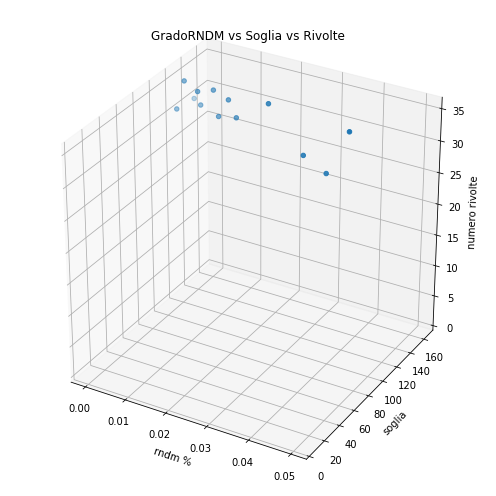

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], depthshade=True)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('GradoRNDM vs Soglia vs Rivolte')
ax.set_ybound(0,170)
ax.set_zbound(0,36)
plt.tight_layout()


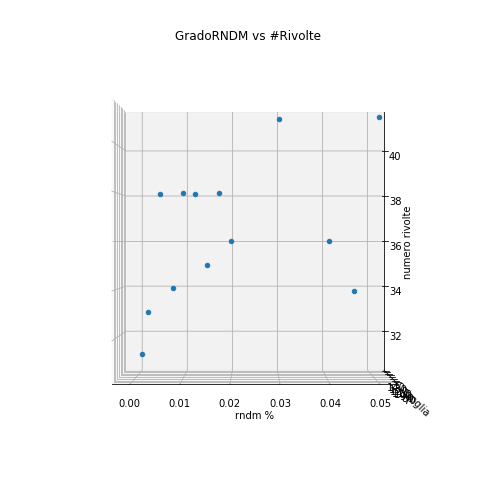

In [112]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('GradoRNDM vs #Rivolte')
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


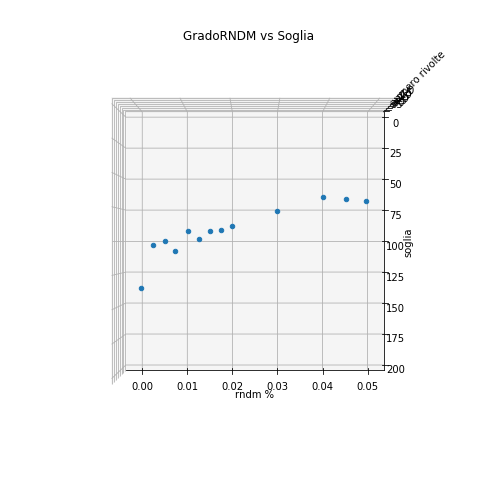

In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('GradoRNDM vs Soglia')
ax.set_ybound(0,200)
ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()


## GradoRNDM vs Soglini vs #Rivoltini

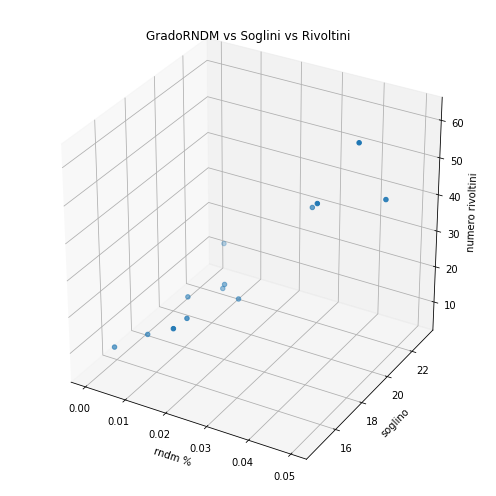

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], depthshade=True)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Soglini vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
plt.tight_layout()
plt.show()


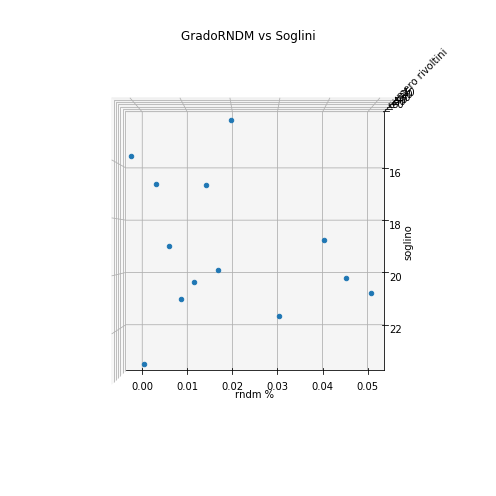

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Soglini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()


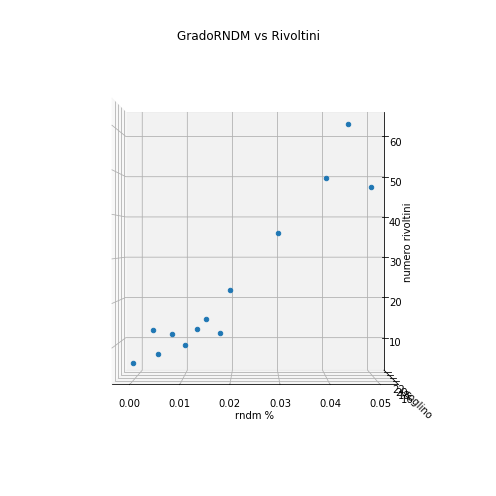

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


## GradoRNDM vs #Rivolte vs #Rivoltini

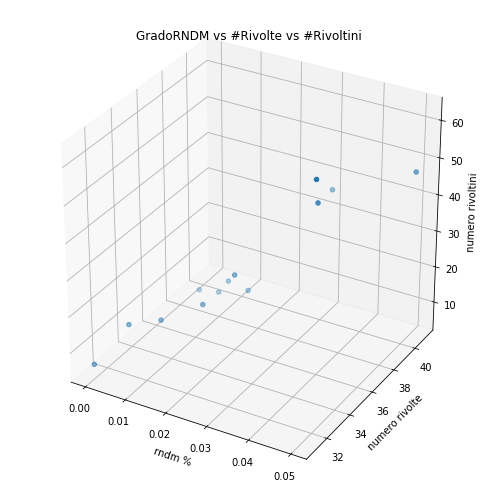

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], 
           #c=file[file.columns[-4]], 
           depthshade = True)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs #Rivolte vs #Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
plt.tight_layout()
plt.show()


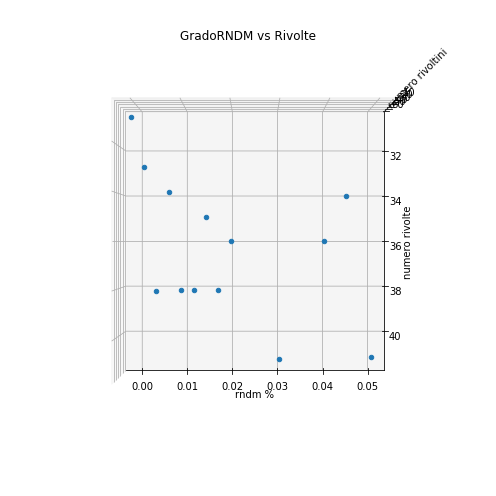

In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Rivolte')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()

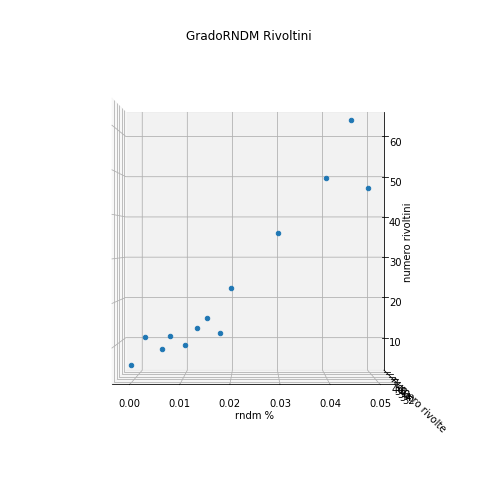

In [118]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


# Scatter plot soglie soglini

In [119]:
dataset_scatter = pd.read_excel(r'/home/gdeandrea/Scaricati/soglie_soglini_20.xlsx', sheet_name=None, usecols=[1,2])

In [120]:
dataset_keys = list(dataset_scatter.keys())

In [122]:
soglie_df_list = []
soglini_df_list = []
for i,key in enumerate(dataset_keys):
    if i%2 == 0:
        soglie_df_list.append(dataset_scatter[key])
    else:
        soglini_df_list.append(dataset_scatter[key])   

In [123]:
soglie[soglie.columns[0]].to_numpy()

array([ 56.9448,  85.3   ,  58.0053,  79.727 ,  67.5093,  73.8303,
        60.7715,  83.407 ,  51.1876,  96.6947,  67.2754,  83.3952,
        39.0641,  80.2625,  56.8785,  95.5986,  76.051 ,  62.403 ,
        65.2811,  85.7338,  95.4667,  61.021 ,  67.9898,  65.8226,
        92.9264, 113.836 ,  85.9787,  90.4284,  84.457 ,  55.7312,
        62.6542,  58.2033,  82.948 , 112.04  ,  96.1186, 103.882 ])

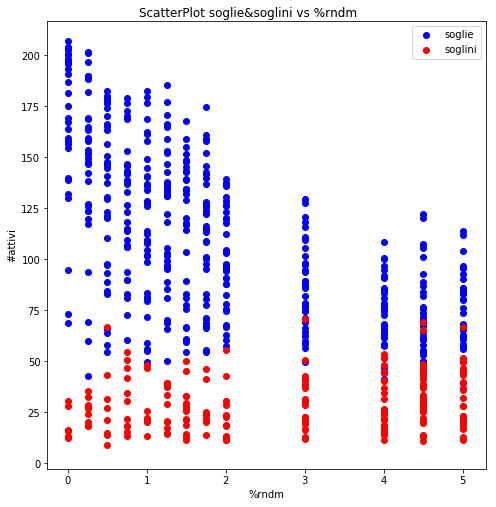

In [137]:
livelli_random = [0,.25,.5,.75,1.,1.25,1.5,1.75,2,3,4,4.5,5]
fig, ax = plt.subplots(1,1, figsize=(7,7))
fig.suptitle('ScatterPlot soglie&soglini vs %rndm',y=1)
for idx, (soglie, soglini) in enumerate(zip(soglie_df_list, soglini_df_list)):
    idx_list = []
    for i in range(len(soglie)):
        idx_list.append(livelli_random[idx])
    if idx==1:
        ax.scatter(np.array(idx_list), soglie[soglie.columns[0]].to_numpy(), c='b', label='soglie')
    else:
        ax.scatter(np.array(idx_list), soglie[soglie.columns[0]].to_numpy(), c='b')
    
    idx_list = []
    for i in range(len(soglini)):
        idx_list.append(livelli_random[idx])
    if idx==1:
        ax.scatter(np.array(idx_list), soglini[soglini.columns[0]].to_numpy(), c='r', label='soglini')
    else:
        ax.scatter(np.array(idx_list), soglini[soglini.columns[0]].to_numpy(), c='r')

ax.set_xlabel('%rndm')
ax.set_ylabel('#attivi')
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
x = [0]
for i in range(8):
    x.append((i+1)*0.25)
    x.append((i+1)*0.25)
x.append(3.)
x.append(3.)
x.append(4.)
x.append(4.)
x.append(4.45)
x.append(4.45)
x.append(5.)
x.append(5.)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
points_list = []
for i in range(25):
    
    label= 'soglie'
    colore='b'
    
    if i%2 == 0 and i != 0 and i!=1:
        label = 'soglini'
        colore = 'r'
    else:
        label= 'soglie'
        colore='b'
        
    a = ax.scatter([x[i] for j in range(len(full_df.iloc[:,i]))], full_df.iloc[:,i], c=colore)
    points_list.append(a)
ax.set_title('ScatterPlot - soglie e soglini vs %rndm')   
ax.set_xlabel('rndm%')
ax.set_ylabel('soglie(blu) e soglini(rosso), #attivi')
fig.tight_layout()
plt.show()

# Plot metriche rivolte vs grado rndm

## Valori Soglie

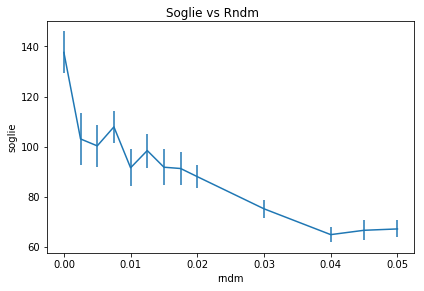

In [141]:
plt.suptitle('Soglie vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file[file.columns[1]], yerr=file[file.columns[2]])
plt.ylabel('soglie')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Soglini

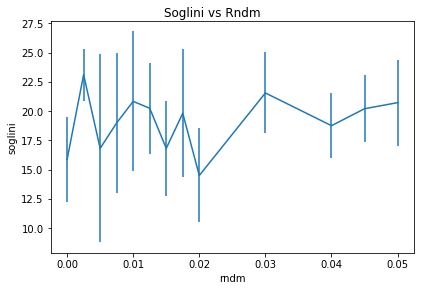

In [142]:
plt.suptitle('Soglini vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['soglino'], yerr=file['err_soglino'])
plt.ylabel('soglini')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Ampiezze

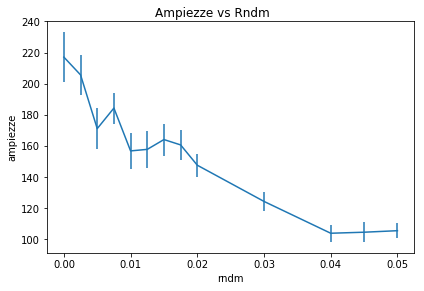

In [143]:
plt.suptitle('Ampiezze vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['ampiezze'], yerr=file['errore.2'])
plt.ylabel('ampiezze')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Durate

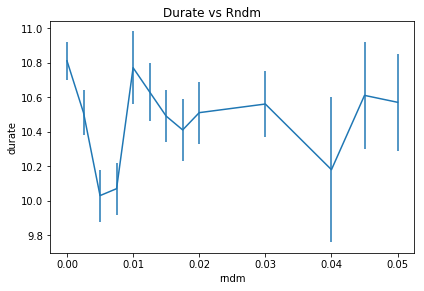

In [144]:
plt.suptitle('Durate vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['durate'], yerr=file['errore'])
plt.ylabel('durate')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Tempi Attesa

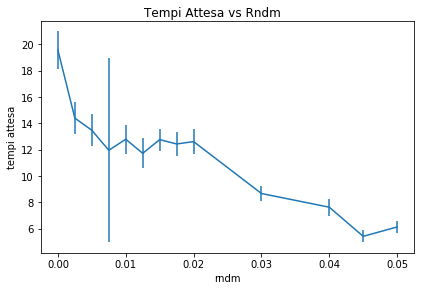

In [145]:
plt.suptitle('Tempi Attesa vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['tempiattesa'], yerr=file['errore.1'])
plt.ylabel('tempi attesa')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()